<a href="https://colab.research.google.com/github/Sofia-dsc/Repo-Procesamiento-del-habla/blob/main/Desafio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFÍO CLUSTERING**
### **Alumna:** Sofía Roldán Varela

1) Deberá elegir un dataset no trabajado en clases para aplicar lo aprendido en aprendizaje no supervisado: aplicar clustering y/o reducción de dimensionalidad.

2) Elija un dataset para la tarea entre los siguientes:

https://archive.ics.uci.edu/datasets?Task=Clustering&FeatureTypes=Numerical&skip=0&take=10&sort=desc&orderBy=NumHits&search=

3) No podrá repetir o utilizar el mismo dataset que algún otro estudiante. Para ello debe postear en este grupo cual es su dataset elegido. Una vez elegido no podrá cambiarlo.

4) Debe postear aquí como entrega el enlace a su notebook colab público, también almacenado en su github.

5) En su notebook debe tener como mínimo los siguientes apartados:

5.1 Presentación y descripción del dataset.

5.2 Pre-procesamiento del dataset

5.3 Explicación del objetivo (por qué aplicará aprendizaje por refuerzo)

5.4 Elección de modelos a utilizar.

5.5 Entrenamiento de los modelos (mínimo dos)

5.6 Resultados obtenidos y su análisis

5.7 Conclusiones

# **Presentación del Dataset**

Link: https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

### Este dataset contiene información sobre las características acústicas extraídas de las sílabas de los llamados de anuros (ranas), que incluyen la familia, el género y las etiquetas de la especie (multietiqueta).

### Es un conjunto de datos multilabel con tres columnas de etiquetas. Este conjunto de datos fue creado segmentando 60 grabaciones de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada grabación corresponde a un espécimen (una rana individual), y también se incluye el ID del registro como una columna adicional.

### Estos registros fueron recopilados in situ bajo condiciones de ruido real (sonido de fondo). Algunas especies provienen del campus de la Universidad Federal de Amazonas, en Manaus; otras de la Mata Atlántica, Brasil; y una de ellas de Córdoba, Argentina.

# **Objetivo**
### Para este dataset me interesa realizar un Clustering para la Evaluación de Ruido de Fondo, es decir, separar las sílabas acústicas de las ranas de los ruidos de fondo (como el sonido ambiental de la grabación), para obtener una segmentación más limpia de las llamadas.

### Utilizando técnicas de clustering (como K-means o DBSCAN) sobre las características acústicas, se podría agrupar las sílabas acústicas en función de su similitud, y distinguirlas de los segmentos que corresponden a ruido de fondo o a sonidos no relacionados con la llamada de la rana.

### Esto ayudaría a mejorar la calidad de las grabaciones segmentadas donde las sílabas de las ranas se agrupan en un cluster, y el ruido de fondo en otro, lo que podría ser útil para preprocesamiento en tareas de clasificación posterior.

# **Modelo 1**

## Para el primero modelo voy a trabajar **K-MEANS**

# **Preprocesamiento**
Comienzo transformando mis datos a un Dataframe

In [2]:
import pandas as pd

# Leo el archivo CSV
df = pd.read_csv('Frogs_MFCCs.csv')

# Muestro las primeras filas del DataFrame
print(df.head())

# Uso info para ver las características de mi df
df.info()

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

### Ahora voy a seleccionar las características acústicas relevantes, que son aquellas columnas que contienen las características acústicas, que en este caso son los MFCCs. Estas características son las que voy a usar para separar las sílabas de las ranas del ruido de fondo.

In [3]:
# Selecciono solo las columnas de MFCCs
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6','MFCCs_ 7','MFCCs_ 8','MFCCs_ 9', 'MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14','MFCCs_15','MFCCs_16','MFCCs_17','MFCCs_18','MFCCs_19','MFCCs_20','MFCCs_21','MFCCs_22']]

### Escalo los datos antes de aplicar K-means, ya que este algoritmo es sensible a la escala de las características.

In [4]:
from sklearn.preprocessing import StandardScaler

# Escalo las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determino el número de clusters (Ruido vs. Sílaba), dado que busco separar las sílabas de las ranas del ruido de fondo hay dos clusters: uno para las sílabas y otro para el ruido.

In [7]:
from sklearn.cluster import KMeans

# Aplicar K-means con 2 clusters (Sílaba de rana vs. Ruido de fondo)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Obtengo las etiquetas de los clusters (0 para ruido, 1 para sílabas)
df['cluster'] = kmeans.labels_

# Visualizo las primeras filas para verificar los resultados
print(df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'cluster']].head())

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  cluster
0       1.0  0.152936 -0.105586        1
1       1.0  0.171534 -0.098975        1
2       1.0  0.152317 -0.082973        1
3       1.0  0.224392  0.118985        1
4       1.0  0.087817 -0.068345        1


### Utilizo la técnica PCA de reducción de dimensionalidad para visualizar los clusters en 2D.

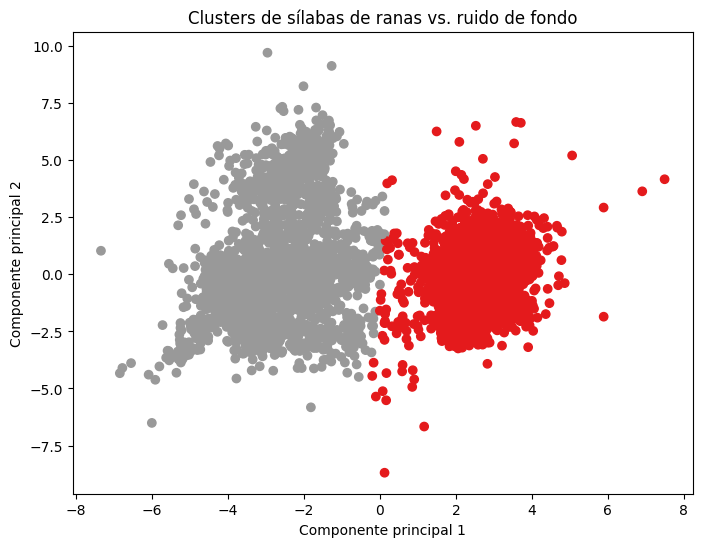

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplico PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Creo un DataFrame con los dos primeros componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añado la columna del cluster
df_pca['cluster'] = df['cluster']

# Grafico los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='Set1')
plt.title('Clusters de sílabas de ranas vs. ruido de fondo')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

## **Evaluación**
### Para evaluar si la segmentación fue exitosa, puedo revisar cómo las sílabas de las ranas (que generalmente tienen un patrón acústico claro) se agrupan en un cluster, mientras que el ruido de fondo (que tiene un patrón más difuso) se agrupa en el otro.

### Cuento cuántas sílabas y cuántos segmentos de ruido se encuentran en cada cluster

In [9]:
# Veo la cantidad de sílabas y ruido en cada cluster
print(df['cluster'].value_counts())

cluster
1    3628
0    3567
Name: count, dtype: int64


## **Conclusión**
### Con esto puedo concluir que hay **3567** segmentos de ruido agrupados en un cluster, y **3628** sílabas de ranas agrupadas en otro cluster. Esto nos ayudaría para preprocesamiento en tareas de clasificación donde podemos utilizar solo las sílabas de ranas, eliminando los segmentos de ruido.

# **Modelo 2**
## Para el segundo modelo voy a trabajar **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [15]:
# Utlizo X_scaled que contiene mis datos ya normalizados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Ajusto mi modelo con los siguientes parámetros:

- **eps**: distancia máxima entre dos puntos para ser considerados vecinos
- **min_samples**: número mínimo de puntos en una vecindad para ser considerado un clúster


In [29]:
# Ajusto el modelo DBSCAN
dbscan = DBSCAN(eps=2.6, min_samples=1000)

# Entreno el modelo
dbscan.fit(X_scaled)

# Creo las etiquetas de mis clústers
labels = dbscan.labels_

# Identifico los segmentos de ruido (son aquellos puntos clasificados como -1)
noise = labels == -1
print(f'Número de puntos clasificados como ruido: {sum(noise)}')


Número de puntos clasificados como ruido: 3786


### Realizo una visualización de los resultados en 2D, para eso voy a reducir dimensionalidad (usando PCA)

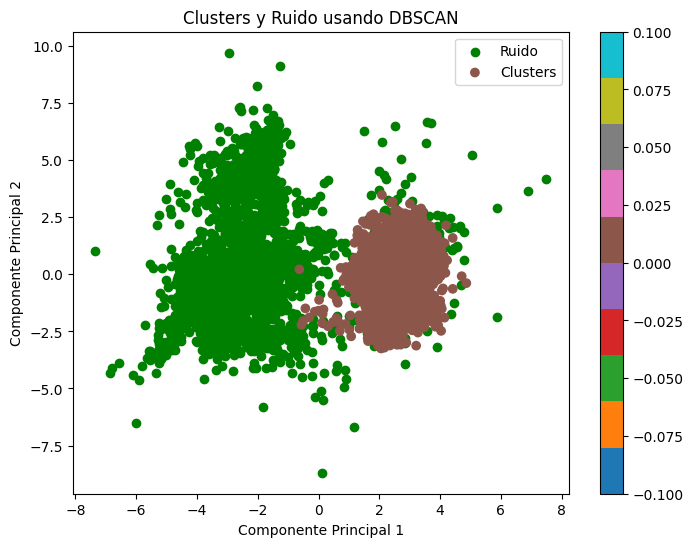

In [30]:
# Reduzco dimensionalidad para la visualización usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Grafico los puntos y los clusters encontrados
plt.figure(figsize=(8, 6))

# Asigno los puntos clasificados como ruido en color verde
plt.scatter(X_pca[noise, 0], X_pca[noise, 1], color='green', label='Ruido')

# Asigno los clústeres encontrados por DBSCAN
plt.scatter(X_pca[~noise, 0], X_pca[~noise, 1], c=labels[~noise], cmap='tab10', label='Clusters')

# Añado etiquetas al gráfico
plt.title('Clusters y Ruido usando DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.colorbar()
plt.show()

## Conclusión
### DBSCAN es una buena opción para identificar clústeres de alta densidad y separar el ruido, lo cual es útil para mi caso, donde el objetivo es separar las sílabas acústicas de las ranas del ruido de fondo. Para este modelo no necesito especificar el número de clústeres de antemano, y el modelo puede identificar puntos de ruido con facilidad. Pero tuve que ir cambiando y probando distintos hiperparámetros para que me de un buen resultado parecido al modelo anterior y no me clasifique todos los puntos en un solo cluster.

Para realizar este trabajo me ayudé con algunas documentaciones

Scikit-learn: PCA (Principal Component Analysis)

https://scikit-learn.org/stable/modules/decomposition.html#pca

Scikit-learn: K-means (K-means Clustering)

https://scikit-learn.org/stable/modules/clustering.html#k-means

Towards Data Science - K-means Algorithm

https://towardsdatascience.com/a-comprehensive-intuition-guide-to-k-means-clustering-8c8a93d05371